In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np
from scipy.ndimage import gaussian_filter1d



Run the first cell to initial the notebook. Edit the directory path in the next cell. The third last cell is for sorting and saving `csv` files for origin. The second last and last cell are for SS calculation. 

In [18]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-20-CVD\\IdVtg-fresh"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [2]:
filename = 'C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-16-CVD-IdVtg\\R10C8-T__ExfoliatedMoS2_TGIdVg.csv'
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-1.500,0.1,2.553000e-11,-4.405200e-10,2.727100e-10
1,-1.485,0.1,2.468000e-10,-4.848300e-10,2.603800e-10
2,-1.470,0.1,2.615400e-10,-4.948400e-10,2.312500e-10
3,-1.455,0.1,2.176300e-10,-4.331000e-10,2.256700e-10
4,-1.440,0.1,2.416600e-10,-3.741700e-10,2.185000e-10


In [3]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   VD            ID           ITG           Ibg  forward
0    -1.500  0.1  2.553000e-11 -4.405200e-10  2.727100e-10     True
1    -1.485  0.1  2.468000e-10 -4.848300e-10  2.603800e-10     True
2    -1.470  0.1  2.615400e-10 -4.948400e-10  2.312500e-10     True
3    -1.455  0.1  2.176300e-10 -4.331000e-10  2.256700e-10     True
4    -1.440  0.1  2.416600e-10 -3.741700e-10  2.185000e-10     True
5    -1.425  0.1  2.092400e-10 -3.915500e-10  2.085300e-10     True
6    -1.410  0.1  1.837700e-10 -3.100600e-10  2.043900e-10     True
7    -1.395  0.1  1.577800e-10 -2.931500e-10  1.972500e-10     True
8    -1.380  0.1  1.757700e-10 -3.464800e-10  1.975500e-10     True
9    -1.365  0.1  1.772300e-10 -3.315500e-10  1.885100e-10     True
10   -1.350  0.1  1.866300e-10 -3.296300e-10  1.924400e-10     True
11   -1.335  0.1  1.006200e-10 -2.743800e-10  1.909900e-10     True
12   -1.320  0.1  8.396000e-11 -2.451300e-10  1.870500e-10     True
13   -1.305  0.1  9.613000e-11 -2.502800e-10  1.

In [4]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG',' Ibg'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0),
            (' Ibg', 0.1),
            (' Ibg', 0.4),
            (' Ibg', 0.7),
            (' Ibg', 1.0)],
           names=[None, ' VD'])

In [5]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     6.487200e-10  1.752000e-09  1.595700e-09  3.439200e-09   
-1.485 False     6.089600e-10  1.608600e-09  1.635400e-09  2.737200e-09   
-1.470 False     6.422200e-10  1.425200e-09  1.601000e-09  2.819200e-09   
-1.455 False     5.897500e-10  1.550000e-09  1.466900e-09  1.886400e-09   
-1.440 False     6.704700e-10  1.616800e-09  1.714000e-09  1.449300e-09   
...                       ...           ...           ...           ...   
 1.440 True      9.736440e-08  3.679800e-07  6.261000e-07  8.595600e-07   
 1.455 True      9.872480e-08  3.644200e-07  6.307000e-07  8.611400e-07   
 1.470 True      9.857940e-08  3.690800e-07  6.243600e-07  8.601000e-07   
 1.485 True      9.693400e-08  3.662800e-07  6.348200e-07  8.709400e-07   
 1.500 True      9.695280e-08  3.646200e-07  6.278800e-07  8.771400e-07   

                          ITG                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False    -6.655200e-10 -1.733300e-09 -1.491400e-09 -3.527400e-09   
-1.485 False    -6.454600e-10 -1.568800e-09 -1.529300e-09 -3.613400e-09   
-1.470 False    -6.329800e-10 -1.576100e-09 -1.581200e-09 -3.104600e-09   
-1.455 False    -5.995400e-10 -1.500000e-09 -1.518800e-09 -2.622000e-09   
-1.440 False    -7.192800e-10 -1.499500e-09 -1.703000e-09 -1.480000e-09   
...                       ...           ...           ...           ...   
 1.440 True      5.453600e-10  2.237700e-10  1.405800e-10  6.217000e-11   
 1.455 True      5.751600e-10  2.219700e-10  1.459300e-10  6.701000e-11   
 1.470 True      5.859100e-10  2.583000e-10  1.463200e-10  3.811000e-11   
 1.485 True      6.874000e-10  2.317500e-10  1.933400e-10  3.976000e-11   
 1.500 True      6.914300e-10  2.524000e-10  1.833200e-10  3.899000e-11   

                          Ibg                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False     2.472000e-11  2.318000e-11  2.406000e-11  2.026000e-11  
-1.485 False     2.377000e-11  2.233000e-11  2.399000e-11  2.139000e-11  
-1.470 False     2.221000e-11  2.156000e-11  2.286000e-11  2.301000e-11  
-1.455 False     2.202000e-11  2.030000e-11  2.012000e-11  2.072000e-11  
-1.440 False     2.080000e-11  2.202000e-11  2.040000e-11  1.617000e-11  
...                       ...           ...           ...           ...  
 1.440 True     -5.340000e-12 -3.163000e-11 -3.106000e-11 -2.422000e-11  
 1.455 True     -2.987000e-11 -2.212000e-11 -2.908000e-11 -2.258000e-11  
 1.470 True     -1.204000e-11 -2.151000e-11 -2.879000e-11 -2.187000e-11  
 1.485 True     -2.254000e-11 -2.287000e-11 -2.632000e-11 -2.551000e-11  
 1.500 True     -1.255000e-11 -2.165000e-11 -2.667000e-11 -2.221000e-11  

[402 rows x 12 columns]

In [6]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     6.487200e-10  1.752000e-09  1.595700e-09  3.439200e-09   
-1.485 False     6.089600e-10  1.608600e-09  1.635400e-09  2.737200e-09   
-1.470 False     6.422200e-10  1.425200e-09  1.601000e-09  2.819200e-09   
-1.455 False     5.897500e-10  1.550000e-09  1.466900e-09  1.886400e-09   
-1.440 False     6.704700e-10  1.616800e-09  1.714000e-09  1.449300e-09   

                          ITG                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False    -6.655200e-10 -1.733300e-09 -1.491400e-09 -3.527400e-09   
-1.485 False    -6.454600e-10 -1.568800e-09 -1.529300e-09 -3.613400e-09   
-1.470 False    -6.329800e-10 -1.576100e-09 -1.581200e-09 -3.104600e-09   
-1.455 False    -5.995400e-10 -1.500000e-09 -1.518800e-09 -2.622000e-09   
-1.440 False    -7.192800e-10 -1.499500e-09 -1.703000e-09 -1.480000e-09   

                          Ibg                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False     2.472000e-11  2.318000e-11  2.406000e-11  2.026000e-11  
-1.485 False     2.377000e-11  2.233000e-11  2.399000e-11  2.139000e-11  
-1.470 False     2.221000e-11  2.156000e-11  2.286000e-11  2.301000e-11  
-1.455 False     2.202000e-11  2.030000e-11  2.012000e-11  2.072000e-11  
-1.440 False     2.080000e-11  2.202000e-11  2.040000e-11  1.617000e-11

In [7]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0),
 (' Ibg', 0.1),
 (' Ibg', 0.4),
 (' Ibg', 0.7),
 (' Ibg', 1.0)]

In [8]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')
for tup in column_names_list[8:]:
    new_list.append(f'Ibg, V_D = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG    forward                                                               
-1.500 False      6.487200e-10   1.752000e-09   1.595700e-09   3.439200e-09   
-1.485 False      6.089600e-10   1.608600e-09   1.635400e-09   2.737200e-09   
-1.470 False      6.422200e-10   1.425200e-09   1.601000e-09   2.819200e-09   
-1.455 False      5.897500e-10   1.550000e-09   1.466900e-09   1.886400e-09   
-1.440 False      6.704700e-10   1.616800e-09   1.714000e-09   1.449300e-09   
...                        ...            ...            ...            ...   
       True       2.416600e-10   1.053400e-09   2.696700e-09   3.135200e-09   
-1.455 True       2.176300e-10   1.024500e-09   2.926600e-09   3.000600e-09   
-1.470 True       2.615400e-10   9.969000e-10   3.086300e-09   2.954300e-09   
-1.485 True       2.468000e-10   1.051000e-09   3.304200e-09   2.838100e-09   
-1.500 True       2.553000e-11   1.290800e-09   2.577300e-09   3.269600e-09   

                 Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG    forward                                                   
-1.500 False      -6.655200e-10   -1.733300e-09   -1.491400e-09   
-1.485 False      -6.454600e-10   -1.568800e-09   -1.529300e-09   
-1.470 False      -6.329800e-10   -1.576100e-09   -1.581200e-09   
-1.455 False      -5.995400e-10   -1.500000e-09   -1.518800e-09   
-1.440 False      -7.192800e-10   -1.499500e-09   -1.703000e-09   
...                         ...             ...             ...   
       True       -3.741700e-10   -9.604300e-10   -2.792900e-09   
-1.455 True       -4.331000e-10   -9.665300e-10   -2.741600e-09   
-1.470 True       -4.948400e-10   -9.243100e-10   -2.937200e-09   
-1.485 True       -4.848300e-10   -1.000370e-09   -3.216600e-09   
-1.500 True       -4.405200e-10   -9.178000e-10   -2.518400e-09   

                 Itg, V_D = 1.0  Ibg, V_D = 0.1  Ibg, V_D = 0.4  \
 VTG    forward                                                   
-1.500 False      -3.527400e-09    2.472000e-11    2.318000e-11   
-1.485 False      -3.613400e-09    2.377000e-11    2.233000e-11   
-1.470 False      -3.104600e-09    2.221000e-11    2.156000e-11   
-1.455 False      -2.622000e-09    2.202000e-11    2.030000e-11   
-1.440 False      -1.480000e-09    2.080000e-11    2.202000e-11   
...                         ...             ...             ...   
       True       -3.063700e-09    2.185000e-10   -6.714000e-11   
-1.455 True       -2.466500e-09    2.256700e-10   -6.907000e-11   
-1.470 True       -2.975200e-09    2.312500e-10   -7.236000e-11   
-1.485 True       -3.119100e-09    2.603800e-10   -7.731000e-11   
-1.500 True       -3.423700e-09    2.727100e-10   -8.278000e-11   

                 Ibg, V_D = 0.7  Ibg, V_D = 1.0  
 VTG    forward                                  
-1.500 False       2.406000e-11    2.026000e-11  
-1.485 False       2.399000e-11    2.139000e-11  
-1.470 False       2.286000e-11    2.301000e-11  
-1.455 False       2.012000e-11    2.072000e-11  
-1.440 False       2.040000e-11    1.617000e-11  
...                         ...             ...  
       True       -4.939000e-11    1.320000e-12  
-1.455 True       -5.231000e-11   -1.680000e-12  
-1.470 True       -5.932000e-11   -1.208000e-11  
-1.485 True       -6.150000e-11   -1.526000e-11  
-1.500 True       -6.971000e-11   -1.472000e-11  

[402 rows x 12 columns]

In [9]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new['Id, V_D = 0.1'] = abs(df_new['Id, V_D = 0.1'])
df_new['Itg, V_D = 0.1'] = abs(df_new['Itg, V_D = 0.1'])
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0','Ibg, V_D = 0.4', 'Ibg, V_D = 0.7', 'Ibg, V_D = 1.0'],inplace=True)
df_new[' Vbg'] = Vbg
df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1', 'Ibg, V_D = 0.1', ' Vbg'],
      dtype='object')

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_new)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   6.487200e-10   1.752000e-09   1.595700e-09   3.439200e-09   
-1.485   6.089600e-10   1.608600e-09   1.635400e-09   2.737200e-09   
-1.470   6.422200e-10   1.425200e-09   1.601000e-09   2.819200e-09   
-1.455   5.897500e-10   1.550000e-09   1.466900e-09   1.886400e-09   
-1.440   6.704700e-10   1.616800e-09   1.714000e-09   1.449300e-09   
-1.425   6.275300e-10   1.553800e-09   1.503100e-09   1.748100e-09   
-1.410   5.680000e-10   1.533200e-09   1.535100e-09   2.098500e-09   
-1.395   5.268700e-10   1.489500e-09   1.403100e-09   1.602800e-09   
-1.380   5.182700e-10   1.515700e-09   1.412800e-09   1.465700e-09   
-1.365   5.247300e-10   1.295600e-09   1.523400e-09   1.588500e-09   
-1.350   4.813000e-10   1.344800e-09   1.251300e-09   1.573400e-09   
-1.335   4.990500e-10   1.381400e-09   1.334000e-09   1.101800e-09   
-1.320   4.532200e-1

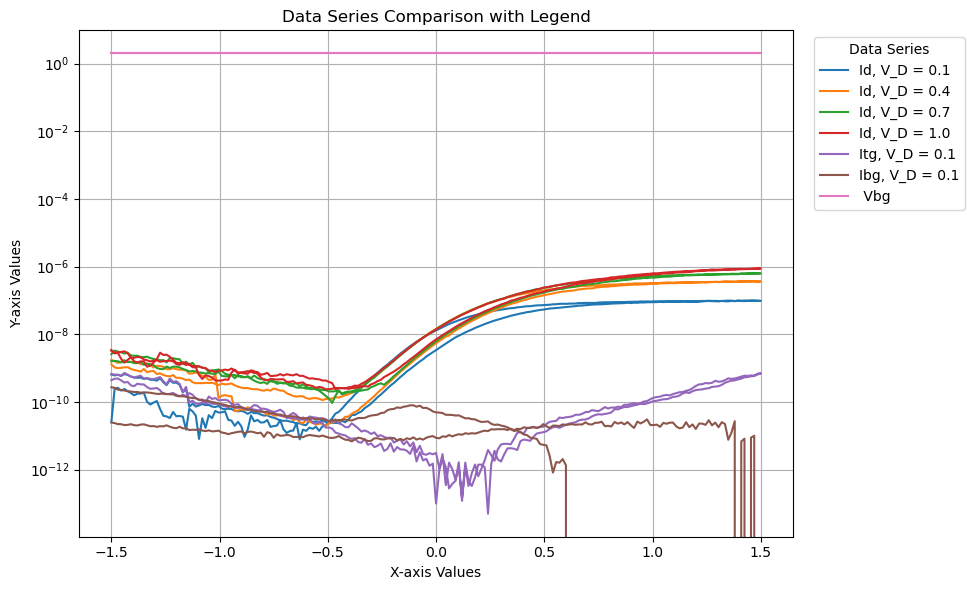

In [11]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [12]:
filtered_df = df_new[df_new['Id, V_D = 0.1'] > 1e-12]
print(filtered_df)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   6.487200e-10   1.752000e-09   1.595700e-09   3.439200e-09   
-1.485   6.089600e-10   1.608600e-09   1.635400e-09   2.737200e-09   
-1.470   6.422200e-10   1.425200e-09   1.601000e-09   2.819200e-09   
-1.455   5.897500e-10   1.550000e-09   1.466900e-09   1.886400e-09   
-1.440   6.704700e-10   1.616800e-09   1.714000e-09   1.449300e-09   
...               ...            ...            ...            ...   
-1.440   2.416600e-10   1.053400e-09   2.696700e-09   3.135200e-09   
-1.455   2.176300e-10   1.024500e-09   2.926600e-09   3.000600e-09   
-1.470   2.615400e-10   9.969000e-10   3.086300e-09   2.954300e-09   
-1.485   2.468000e-10   1.051000e-09   3.304200e-09   2.838100e-09   
-1.500   2.553000e-11   1.290800e-09   2.577300e-09   3.269600e-09   

        Itg, V_D = 0.1  Ibg, V_D = 0.1   Vbg  
 VTG                                      

In [16]:
Vtg = filtered_df.index.to_numpy()
Id_sample = filtered_df['Id, V_D = 1.0'].to_numpy()


In [14]:
def find_first_Id_above_threshold(data_list, threshold):
    try:
        return next(index for index, value in enumerate(data_list) if value > threshold)
    except StopIteration:
        return -1

In [17]:
sigma = 5 # Standard deviation of the Gaussian kernel
smoothed_Id = gaussian_filter1d(Id_sample, sigma)

In [18]:
Id_idx_small = find_first_Id_above_threshold(smoothed_Id,1e-10)
print(f'Vtg = {Vtg[Id_idx_small]}, Id = {smoothed_Id[Id_idx_small]}')
Id_idx_large = find_first_Id_above_threshold(smoothed_Id,1e-9)
print(f'Vtg = {Vtg[Id_idx_large]}, Id = {smoothed_Id[Id_idx_large]}')

Vtg = -1.5, Id = 2.2895669659973408e-09
Vtg = -1.5, Id = 2.2895669659973408e-09


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


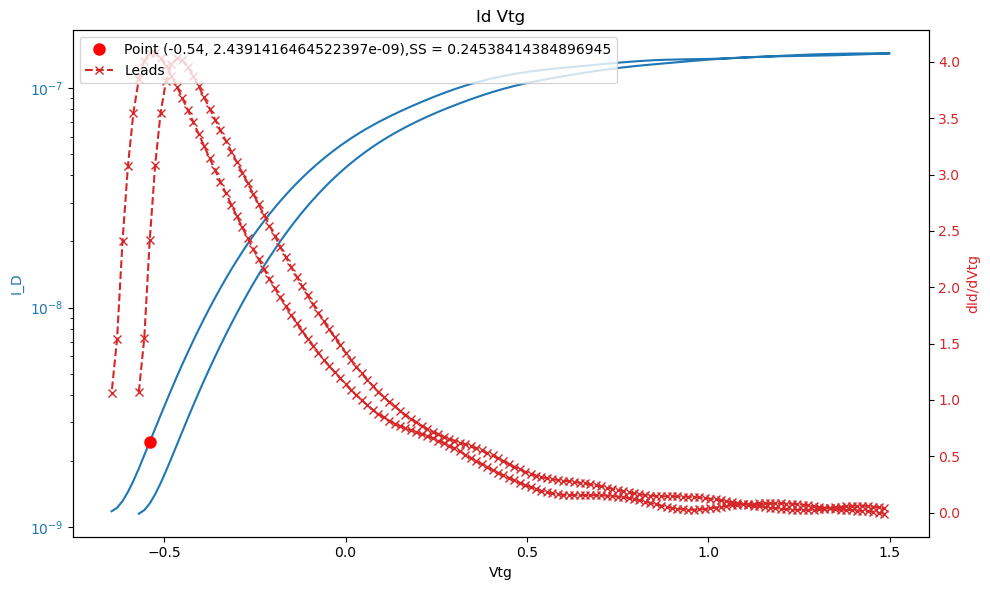

In [ ]:

dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
max_index = np.nanargmax(dIdVg)



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary axis
color = 'tab:blue'
ax1.set_xlabel('Vtg')
ax1.set_ylabel('I_D', color=color)
ax1.plot(Vtg,smoothed_Id)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.plot(Vtg[max_index], smoothed_Id[max_index], 'o', markersize=8, color='red', label=f'Point ({Vtg[max_index]}, {smoothed_Id[max_index]}),SS = {1/max(dIdVg)}')


# Create a second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary axis
color = 'tab:red'
ax2.set_ylabel('dId/dVtg', color=color)
ax2.plot(Vtg,dIdVg, color=color, marker='x', linestyle='--', label='Leads')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(-1e9,1e9)

# Add a title and legend
plt.title('Id Vtg')
fig.tight_layout() # Adjusts plot to ensure everything fits

# To combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [14]:
SS = 1/max(dIdVg)
Vtg_ss = Vtg[np.nanargmax(dIdVg)]

In [ ]:
# For SS calculation & saving files 

SS_list = []
name_list = []
Vtg_upper_list = []
Vtg_lower_list = []
Id_upper_list = []
Id_lower_list = []

for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    
    print(f'SS: {result} started')
    name_list.append(result)
    try:
        Vbg,df = mo.read_csv_IdVtg(file)
    except Exception:
        print("File not processed")
        continue
    

    df_reshaped = mo.reshape_table_by_VD(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + result
    df_sorted.to_csv(filename, index=True)

    df_filtered = fs.filter_noise(df_sorted)
    Vtg, smoothed_Id = fs.grab_V_I_0pt1(df_filtered)
    SS,idx_large,idx_small = fs.find_SS(Vtg,smoothed_Id)
    print(SS)
    SS_list.append(SS)
    Vtg_upper_list.append(Vtg[idx_large])
    Vtg_lower_list.append(Vtg[idx_small])
    Id_upper_list.append(smoothed_Id[idx_large])
    Id_lower_list.append(smoothed_Id[idx_small])

    

    


SS: C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVtg-fresh\R10C13-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.3, Id = 1.1125637605379704e-10
Vtg = -0.09, Id = 1.1783689530467165e-09
0.21
SS: C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVtg-fresh\R10C13-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.33, Id = 1.010944789233355e-10
Vtg = -0.12, Id = 1.1537461362941753e-09
0.21000000000000002
SS: C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVtg-fresh\R11C13-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.315, Id = 1.233329961227131e-10
Vtg = -0.15, Id = 1.1074823115733825e-09
0.165
SS: C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVtg-fresh\R11C13-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.42, Id = 1.0125989739788753e-10
Vtg = -0.24, Id = 1.0681442498904702e-09
0.18
SS: C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVtg-fresh\R12C13-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.24, Id = 1.123147911323354e-10
Vtg = -0.075, Id = 1.072065893508642e-09
0.16499999999999998
SS: C:\

In [21]:
SS_df = pd.DataFrame(list(zip(name_list, SS_list,Vtg_upper_list,Vtg_lower_list,Id_upper_list,Id_lower_list)), columns=['filename', 'SS','Vtg_high','Vtg_low','Id_high','Id_low'])
SS_df.to_csv(f"{directory_path}\\SS_per_file_oct20_threshold_Vd=1.csv", index=False)